<a href="https://colab.research.google.com/github/SanaSoren/Play-store-app-review-analysis/blob/main/Play_store_app_review_analysis_Capstone_Project_SanaSoren.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Play Store App Review Analysis**
**Project Type - EDA**

**Contribution - Individual**

# **Google's mobile operating system has been the dominant force in the global smartphone market, claiming more than 70 percent market share as of 2022, according to Statcounter, it is the largest app store with 3.3 million Android apps as of the first quarter of 2022.**


<img src="https://cdn.dribbble.com/users/640742/screenshots/2631862/2016-04-04.gif" jsaction="load:XAeZkd;" jsname="HiaYvf" class="n3VNCb KAlRDb" alt="A new look for Google Play family of apps by Jonathan Chung for Google on  Dribbble" data-noaft="1" style="width: 465px; height: 348.75px; margin: 0px;">


**The purpose of the project was to gather and analyze detailed information on apps in the Google Play Store in order to provide insights on app features and the current state of the Android app market.**

Let's take a look at the data, which consists of two files:

* **playstore data.csv:** contains all the details of the applications on Google Play. There are 13 features that describe a given app.
* **user_reviews.csv:** contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

Before jumping into the data's provided, let me first explain you about the EDA analysis.



#**What Is Exploratory Data Analysis?**
Exploratory Data Analysis is a data analytics process to understand the data in depth and learn the different data characteristics, often with visual means. This allows you to get a better feel of your data and find useful patterns in it. 

#**Steps Involved in Exploratory Data Analysis**
**1. Data Collection :** Data collection is an essential part of exploratory data analysis. It refers to the process of finding and loading data into our system.

**2. Data Cleaning :** Data cleaning refers to the process of removing unwanted variables and values from your dataset and getting rid of any irregularities in it.

**3. Univariate Analysis :** In Univariate Analysis, you analyze data of just one variable. A variable in your dataset refers to a single feature/ column. You can do this either with graphical or non-graphical means by finding specific mathematical values in the data.

**4. Bivariate Analysis :** Here, you use two variables and compare them. This way, you can find how one feature affects the other. It is done with scatter plots, which plot individual data points or correlation matrices that plot the correlation in hues. You can also use boxplots.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import mean, median
from statistics import mode
%matplotlib inline
import seaborn as sns
# sns.set(font_scale = 1.5)
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **Lets Explore The Play Store APP Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# Load CSV file
play_store = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Play Store App Review Analysis - Capstone - Project/Play Store Data.csv')

In [4]:
# Display the Play Store App data
pd.concat([play_store.head(), play_store.tail()])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# Finding the Row and Column in given dataset
print(play_store.columns)
rows = play_store.shape[0]
columns = play_store.shape[1]
print(f"the no of rows is {rows} and no of columns is {columns}")

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
the no of rows is 10841 and no of columns is 13


By Analysing the given dataset we come to know that, It has **10,841 rows** of data with **13 columns**, which are as follows:
 
* **App Category:** Category of the app. This could be beauty, business, 
entertainment, education...etc.
 
* **Rating:** How users rate the app out of 5, with 1 being the lowest rating and 5 being the highest.
 
* **Reviews:** The number of user reviews each app has received.
 
* **Size:** The memory size needed to install the application.
 
* **Installs:** The number of times each application has been installed by users.
 
* **Type:** Whether the app is free or a paid app.
 
* **Price:** The price of the app.
 
* **Content Rating:** This column specifies the intended audience for the app. Can be for teens, mature audience, or everyone.
 
* **Genres:** The sub-category for each app. Example: for the Education category, this could be Education: Pretend Play, for example.
 
* **Last Updated:** Release date of the most recent update for the app.
 
* **Current Ver:** The app's current version.
 
* **Android Ver:** The oldest version of Android OS supported by the app.



#**Data Cleaning**

In [7]:
# This user define function will give the type,count of null and non null values as well as null ratio
def playstoreinfo():
  temp = pd.DataFrame(index = play_store.columns)
  temp["datatype"] = play_store.dtypes
  temp["not null values"] = play_store.count()
  temp["null value"] = play_store.isnull().sum()
  temp["% of the null value"] = play_store.isnull().mean()
  temp["unique count"] = play_store.nunique()
  return temp
playstoreinfo()

,datatype,not null values,null value,% of the null value,unique count
App,object,10841,0,0.000000,9660
Category,object,10841,0,0.000000,34
Rating,float64,9367,1474,0.135965,40
Reviews,object,10841,0,0.000000,6002
Size,object,10841,0,0.000000,462
Installs,object,10841,0,0.000000,22
Type,object,10840,1,0.000092,3
Price,object,10841,0,0.000000,93
Content Rating,object,10840,1,0.000092,6
Genres,object,10841,0,0.000000,120


◀ **Infrence :**
Rating has 1474 Null values which contributes 13.6% of data. Type has 1 Null value contributing less than 0.1% data. Content Rating has 1 Null value it also contributing less than 0.1% data. Current Ver has 8 Null values which contributes 0.1% data. Android Ver has 3 Null values contributing less than 0.1% data.

#**Drop records where value is missing or value is NaN**

**1. Lets look into Rating Column**

In [8]:
# Remove all records in which rating is null
play_store.dropna(subset = ['Rating'],inplace = True)

In [9]:
play_store.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

**2. Lets look into Android Ver Column**

In [10]:
# Last record has all wrong data in there Android Ver column
play_store[play_store['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


*(i) The first two records have missing version but the third record has misplaced values*

*(ii) Drop the third record i.e. record for "Life Made WI-FI...."*

In [11]:
# So, lets removed the last record
play_store.drop(index = 10472, inplace = True)

*(iii) Replace remaining missing values with mode*

In [12]:

play_store['Android Ver'].fillna(value = mode(play_store['Android Ver']), inplace = True)
play_store.loc[[4453, 4490]]  # After using mode

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,4.1 and up
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,4.1 and up


**3. Lets look into Current Ver column**

In [13]:
play_store[play_store['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


**◀ Inference :** We will not drop any as all record because all records look fine. 

In [14]:
# Fill null with most comman value
play_store['Current Ver'].fillna(value = mode(play_store['Current Ver']), inplace = True)
play_store.loc[[15,1553,6322,7333]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",Varies with device,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",Varies with device,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",Varies with device,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",Varies with device,4.0 and up


In [15]:
play_store.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [16]:
play_store.describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [17]:
play_store.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

◀ **Inference :** Data types of all column here we can see that some contain numeric data but has object data type.

▪ **Lets first clean the price which has dollar sign and object format.**

In [18]:
def price(x):
  if x== '0':
    return x
  else:
    return x[1:]
play_store['Price'] = play_store['Price'].apply(lambda x: price(x))# This will remove dollar sign

In [19]:
# Conerte Price into float value
play_store['Price'] = play_store['Price'].astype('float')

In [20]:
def install(x):
  x = x.split('+')
  y = x[0].split(',')
  return "".join(y)
play_store['Installs'] = play_store['Installs'].apply(lambda x: install(x)) #This will remove comma and + sign  

In [21]:
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [22]:
# Converted Installs to integer
play_store['Installs'] = play_store['Installs'].astype('int')

In [23]:
# Converted Reviews to integer
play_store['Reviews'] = play_store['Reviews'].astype('int')

In [24]:
play_store.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

◀ **Inference :** All are converted to right format

#**Lets check the Rating Column**

In [25]:
play_store[play_store['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


◀ **Inference :** No Rating is grater than 5.

In [26]:
# Reviews should not be more than Installs as only those who Installed can Review the app
play_store[play_store['Reviews']> play_store['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25M,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,Varies with device,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20M,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19M,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6.1M,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4.2M,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16M,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [27]:
play_store.drop(index = play_store[play_store['Reviews'] > play_store['Installs']].index, inplace = True)
play_store[play_store['Reviews'] > play_store['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#**Data Visualization For Play store App Data**

<AxesSubplot:xlabel='Price', ylabel='Price'>

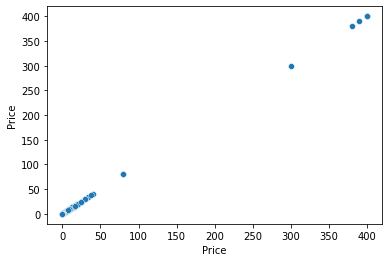

In [28]:
sns.scatterplot(x = 'Price' , y = 'Price', data = play_store)

<AxesSubplot:xlabel='Price', ylabel='Density'>

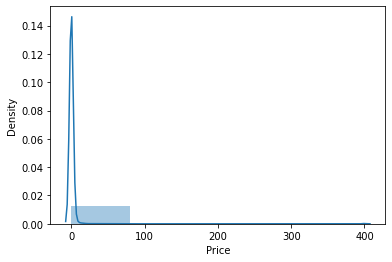

In [29]:
sns.distplot(play_store['Price'], bins = 5)

<AxesSubplot:xlabel='Price', ylabel='Price'>

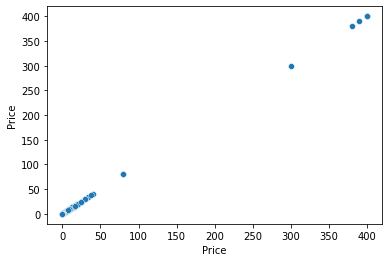

In [30]:
#play_store(index = play_store[play_store['Price'] >= 30].index, inplace = True)
sns.scatterplot(x = 'Price' , y = 'Price', data = play_store) # Without Outliers

<AxesSubplot:xlabel='Reviews', ylabel='Density'>

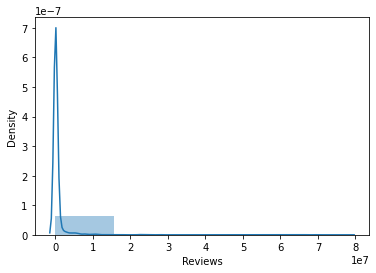

In [31]:
sns.distplot(play_store['Reviews'], bins = 5)

◀ **Inference :** Most of the data are less than 1 million reviews so we remove all above

In [32]:
play_store.drop(index = play_store[play_store['Reviews'] >= 1000000]. index, inplace = True)

<AxesSubplot:xlabel='Reviews', ylabel='Reviews'>

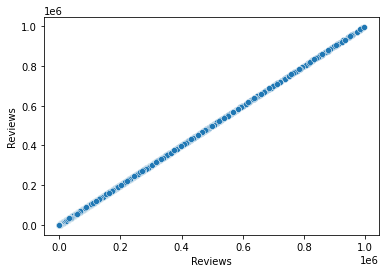

In [33]:
# Without outliers
sns.scatterplot(x = 'Reviews', y = 'Reviews', data = play_store) 
#sns.set(rc = {'figure.figsize': (8,8)})

#**Lets Check the 95th percentile of the data to remove the outliers**
⬅ i.e. last 5

In [34]:
play_store['Installs'].quantile(q = 0.95)

10000000.0

In [35]:
# Removing last 5% which are outliers
play_store.drop(index = play_store[play_store['Installs'] > 10000000].index, inplace = True)

<AxesSubplot:xlabel='Rating', ylabel='Density'>

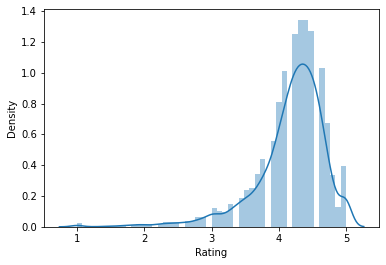

In [36]:
sns.distplot(play_store['Rating'])

◀ **Inference :** distribution of Ratings is a left skewed distribution (Mean is smaller than median) as most of the ratings are between 4-4.5 so most of the app perform well.

▪ We should use some variable with rating to get clear idea of the performance of the application

In [37]:
play_store['Content Rating'].value_counts()

Everyone           6802
Teen                901
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

◀ **Inference :** As content rating is very less for Adults only 18+ and Unrated as they won't need any analysis.

In [38]:
play_store.drop(index = play_store[play_store['Content Rating'] == 'Adults only 18+'].index, inplace = True)
play_store.drop(index = play_store[play_store['Content Rating'] == 'Unrated'].index, inplace = True)

In [39]:
play_store['Content Rating'].value_counts()

Everyone        6802
Teen             901
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

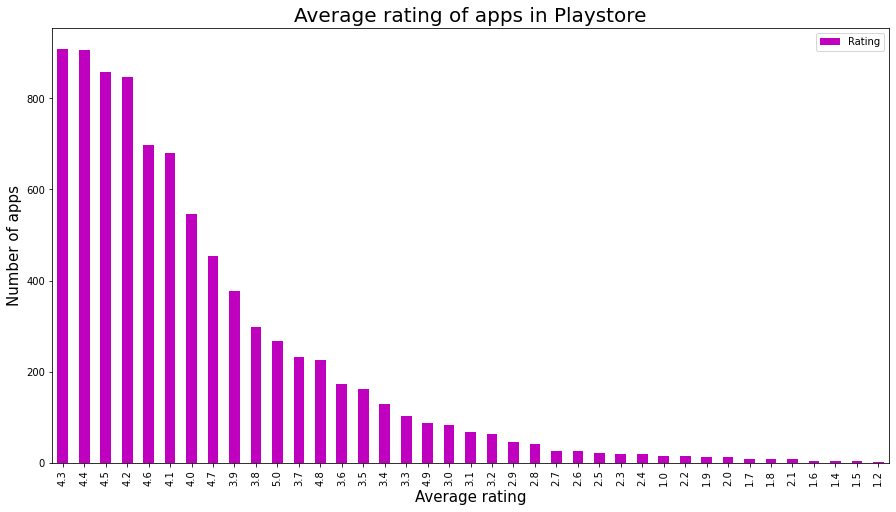

In [40]:
# Average app ratings

play_store['Rating'].value_counts().plot.bar(figsize=(15,8), color = 'm' )
plt.xlabel('Average rating',fontsize = 15 )
plt.ylabel('Number of apps', fontsize = 15)
plt.title('Average rating of apps in Playstore', fontsize = 20)
plt.legend()

◀ **Inference :**We can see from the graph that most of the app are from 15MB to 40MB and as we know all the rating of apps are quit well of 
4  to 4.5

In [41]:
x = play_store['Category'].value_counts()
y = play_store['Category'].value_counts().index
x_list = []
y_list = []
for i in range(len(x)):
    x_list.append(x[i])
    y_list.append(y[i])

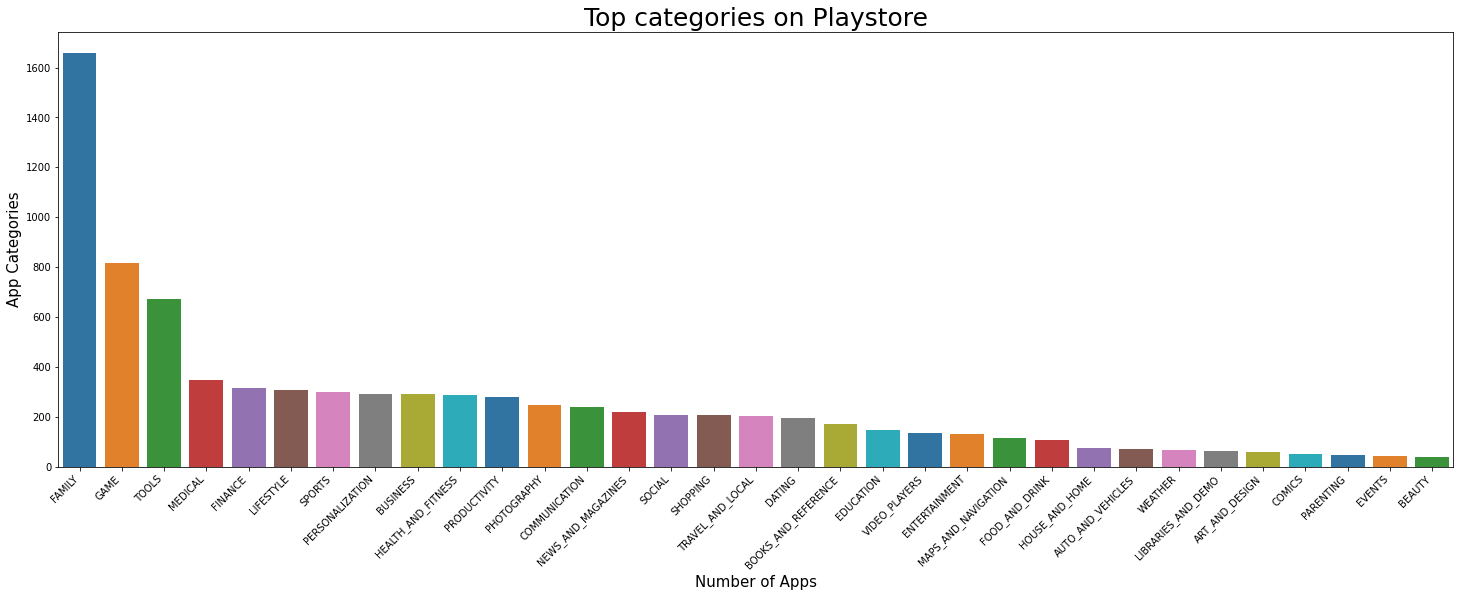

In [42]:
#Number of apps belonging to each category in the playstore
plt.figure(figsize=(25,8))
plt.xlabel('Number of Apps', size=15)
plt.ylabel('App Categories', size=15)
graph = sns.barplot(y = x_list, x = y_list, palette= "tab10")
graph.set_title("Top categories on Playstore", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',);

◀ **Inference :**
So there are all total 33 categories in the dataset From the above output we can come to a conclusion that in playstore most of the apps are under` FAMILY & GAME` category and least are of `EVENTS & BEAUTY` Category.

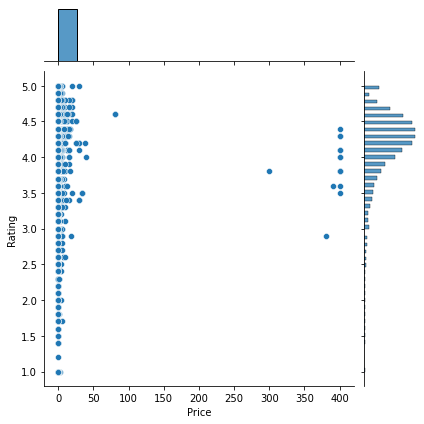

In [43]:
sns.jointplot(x = 'Price', y = 'Rating', data = play_store)

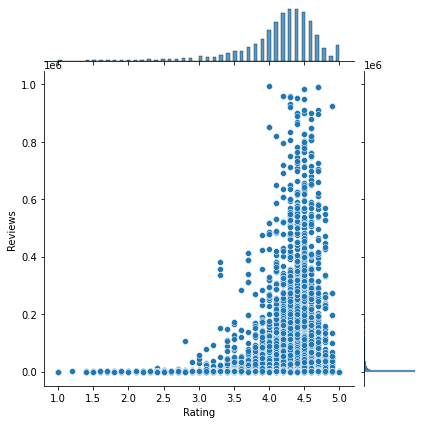

In [44]:
sns.jointplot(x = 'Rating', y = 'Reviews', data = play_store)

◀ **Inference :** Here we can say that paid apps are mostly highly rated Exceptional is there of 0 which are free apps which has mixed ratings.

**Let us remove the free apps and observe only the paid apps.**

In [45]:
data_1 = play_store[play_store['Price'] > 0.0]

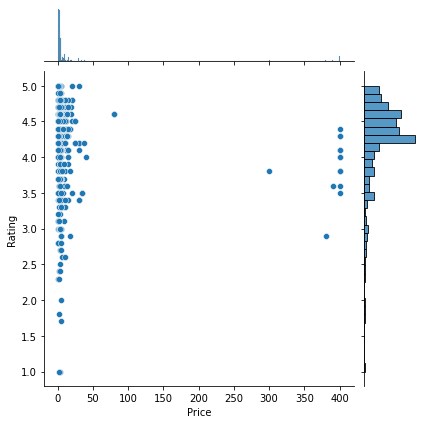

In [46]:
sns.jointplot(x = 'Price', y = 'Rating', data = data_1)

◀ **Inference :** As the free apps removed we get a clear idea and have we can conclude that paid apps are highly rated

Text(0.5, 1.0, 'Pairwise Plot - Rating, Size, Installs, Reviews, Price')

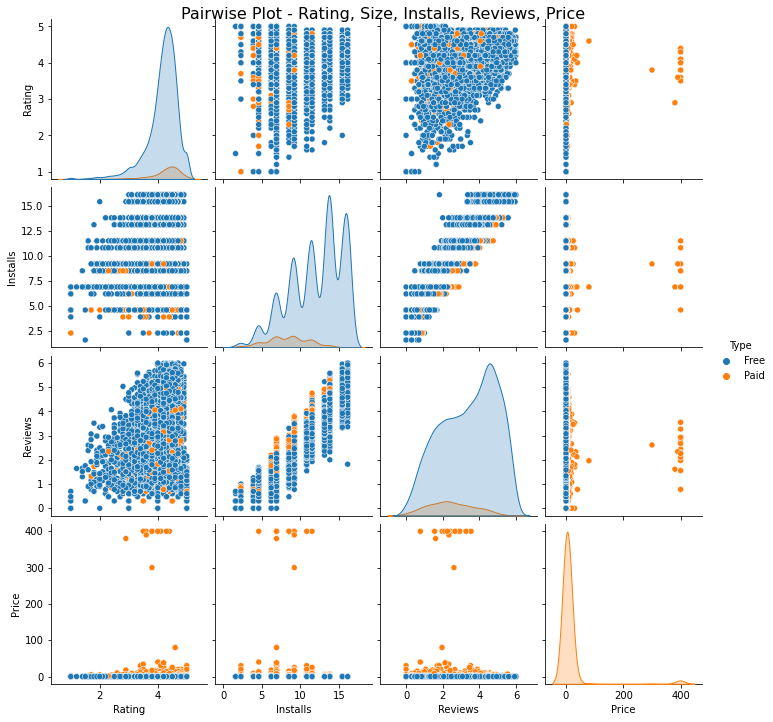

In [47]:
Rating = play_store['Rating']
Size = play_store['Size']
Installs = play_store['Installs']
Reviews = play_store['Reviews']
Type = play_store['Type']
Price = play_store['Price']

p = sns.pairplot(pd.DataFrame(list(zip(Rating, Size, np.log(Installs), np.log10(Reviews), Price, Type)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Price','Type']), hue='Type')
p.fig.suptitle("Pairwise Plot - Rating, Size, Installs, Reviews, Price",x=0.5, y=1.0, fontsize=16)

◀ **Inference :** Most of the Price items are of lesser size so we can say that People prefer to pay for app for app of lesser Size or app are designed in such a way that they are not bulky.

▪ We can conclude from this is that bulky app may not perfrom well in the market.

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

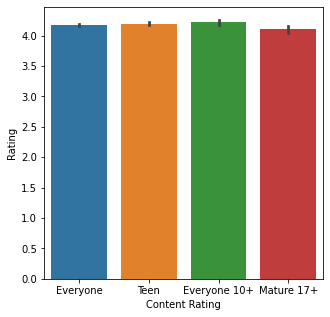

In [48]:
plt.figure(figsize = (5,5))
sns.barplot(x = 'Content Rating', y = 'Rating' , data = play_store)

◀ **Inference :** We can see that at an average all the ratings are nearly the same (close to 4) irrespective of the content rating

▪ But in Mature 17+ it looks like they are lower than others

<AxesSubplot:xlabel='Price'>

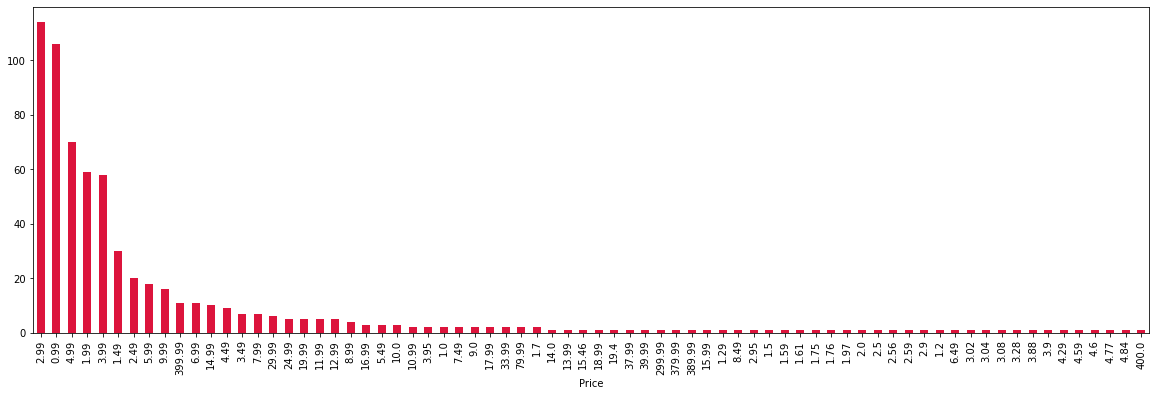

In [49]:
# Creating a df containing only paid apps
paid_df = play_store[play_store['Type']=='Paid']

# Number of apps that can be installed at a particular price 
paid_df.groupby('Price')['App'].count().sort_values(ascending= False).plot.bar(figsize = (20,6), color = 'crimson')

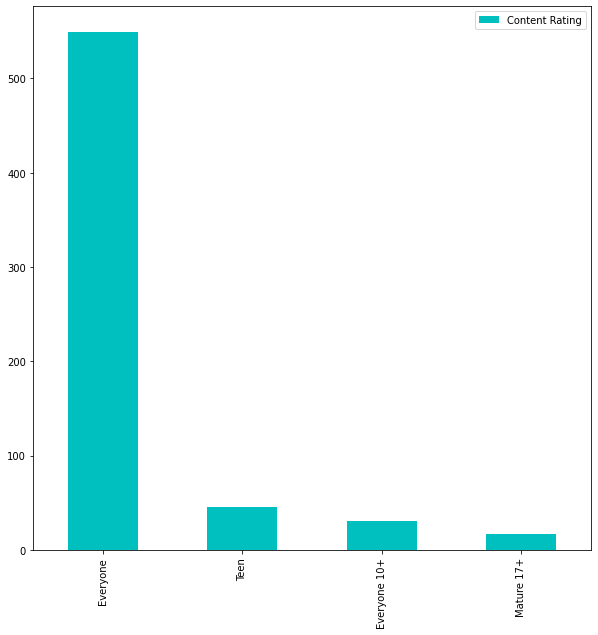

In [50]:
# Paid app content rating
paid_df['Content Rating'].value_counts().plot.bar(figsize=(10,10),color='c')
plt.legend()

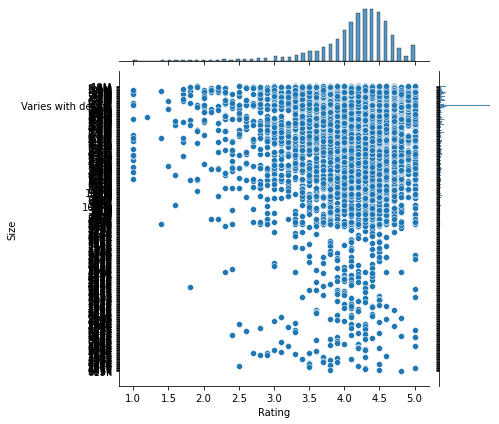

In [51]:
sns.jointplot(x = 'Rating', y = 'Size',data = play_store)

◀ **Inference :** Seems like well known apps (more reviews) gets higher ratings.

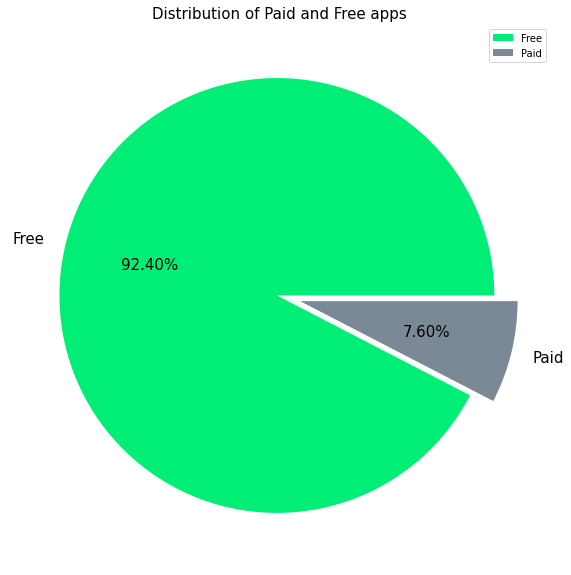

In [52]:
data = play_store['Type'].value_counts() 
labels = ['Free', 'Paid']

# create pie chart
plt.figure(figsize=(10,10))
colors = ["#00EE76","#7B8895"]
explode=(0.01,0.1)
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Distribution of Paid and Free apps',size=15,loc='center')
plt.legend()

◀ **Inference :**
From the above graph we can see that 92% of apps in google play store are free and 8%are paid.

In [53]:
play_store.corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,0.158846,0.118928,-0.019779
Reviews,0.158846,1.000000,0.736179,-0.026393
Installs,0.118928,0.736179,1.000000,-0.037616
Price,-0.019779,-0.026393,-0.037616,1.000000


Text(0.5, 1.0, 'Corelation Heatmap for Playstore Data')

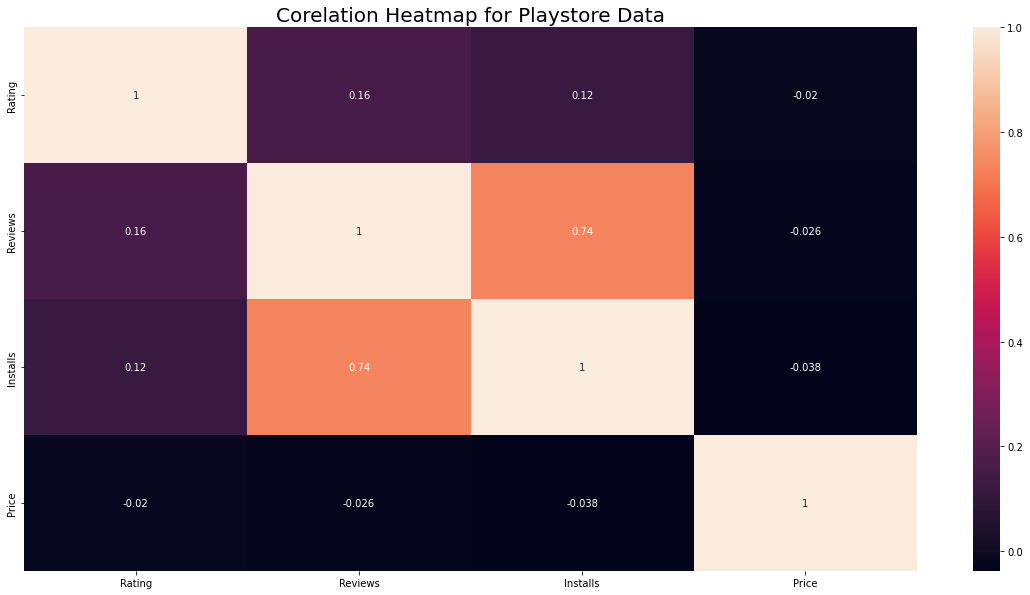

In [54]:
# Heat map for play_store
plt.figure(figsize = (20,10))
sns.heatmap(play_store.corr(), annot= True)
plt.title('Corelation Heatmap for Playstore Data', size=20)

## **Lets Explore User Reviews dataset**

In [55]:
# Reading the userreviews.csv file
user_review = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Play Store App Review Analysis - Capstone - Project/User Reviews.csv')

In [56]:
# Checking the top 10 rows of the data
user_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [57]:
user_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [58]:
# Checking shape and column in dataframe
print(user_review.columns)
rows = user_review.shape[0]
columns = user_review.shape[1]
print(f"the no of rows is {rows} and no of columns is {columns}")

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')
the no of rows is 64295 and no of columns is 5


# **User Review DataSet**
This file contains the result of the sentiment analysis conducted by the dataset creator. It has **64,295 rows** of data and **5 columns**,
Which are as follows:

* **App:** Name of the app.

* **Translated_Review:** Either the original review in English, or a translated version if the orignal review is in another language.

* **Sentiment:** The result of the sentiment analysis conducted on a review. The value is either Positive, Neutral, or Negative.

* **Sentiment_Polarity:** A value indicating the positivity or negativity of the sentiment, values range from -1 (most negative) to 1 (most positive).

* **Sentiment_Subjectivity:** A value from 0 to 1 indicating the subjectivity of the review. Lower values indicate the review is based on factual information, and higher values indicate the review is based on personal or public opinions or judgements.

In [59]:
def Urinfo():
  temp1=pd.DataFrame(index = user_review.columns)
  temp1["datatype"] = user_review.dtypes
  temp1["not null values"] = user_review.count()
  temp1["null value"] = user_review.isnull().sum()
  temp1["% of the null value"] = user_review.isnull().mean().round(4)*100
  temp1["unique count"] = user_review.nunique()
  return temp1
Urinfo()

,datatype,not null values,null value,% of the null value,unique count
App,object,64295,0,0.00,1074
Translated_Review,object,37427,26868,41.79,27994
Sentiment,object,37432,26863,41.78,3
Sentiment_Polarity,float64,37432,26863,41.78,5410
Sentiment_Subjectivity,float64,37432,26863,41.78,4474


◀ **Inference :**

The number of null values are:
* **Translated_Review** has 26868 null values which contributes **41.8%** of the data.
* **Sentiment** has 26863 null values which contributes **41.8%** of the data.
* **Sentiment_Polarity**  has 26863 null values which contributes **41.8%** of the data.
* **Sentiment_Subjectivity** has 26863 null values which contributes **41.8%** of the data.

## **Handling the error and NaN values in the user reviews dataset**

In [60]:
# This user define function will give the type,count of null and non null values as well as null ratio
def user_review_info():
  temp1 = pd.DataFrame(index = user_review.columns)
  temp1["datatype"] = play_store.dtypes
  temp1["not null values"] = play_store.count()
  temp1["null value"] = play_store.isnull().sum()
  temp1["% of the null value"] = play_store.isnull().mean()
  temp1["unique count"] = play_store.nunique()
  return temp1
user_review_info()

,datatype,not null values,null value,% of the null value,unique count
App,object,8452.0,0.0,0.0,7697.0
Translated_Review,NaN,NaN,NaN,NaN,NaN
Sentiment,NaN,NaN,NaN,NaN,NaN
Sentiment_Polarity,NaN,NaN,NaN,NaN,NaN
Sentiment_Subjectivity,NaN,NaN,NaN,NaN,NaN


◀ **Inference :** There are lot of NaN values. We need to analyse those values and see how we can handel them.

In [61]:
user_review[user_review['Translated_Review'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


There are a total of 26868 rows containing NaN values in the Translated_Review column.

We can say that the apps which do not have a review (NaN value insted) tend to have NaN values in the columns `Sentiment, Sentiment_Polarity, and Sentiment_Subjectivity` in the majority of the cases.

**Lets check if there are any exceptions.**

In [62]:
# The rows corresponding to the NaN values in the translated_review column, where the rest of the columns are non null.
user_review[user_review['Translated_Review'].isnull() & user_review['Sentiment'].notna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In the few exceptional cases where the values of remaining columns are not null for null values in the translated_Review column, there seems to be errors. This is because the Sentiment, sentiment ploarity and sentiment subjectivity of the review can be determined if and only if there is a corresponding review.

Hence these values are wrong and can be deleted altogather.

In [63]:
# Deleting the rows containing NaN values
user_review = user_review.dropna()

In [64]:
# Check the shape of the updated dataframe
user_review.shape

(37427, 5)

There are a total of 37427 rows in the updated dataframe.

Hence we have taken care of all the NaN values in the dataframe.

Lets inspect the updated dataframe

<img src="https://miro.medium.com/max/687/1*FRd4BsrZ2VxKLbvVYJQC6w.png" jsaction="load:XAeZkd;" jsname="HiaYvf" class="n3VNCb KAlRDb" alt="Sentiment Analysis using SVM. Sentiment Analysis is the NLP technique… | by  Vasista Reddy | Medium" data-noaft="1" style="width: 465px; height: 203.057px; margin: 1.37162px 0px;">

In [65]:
user_review['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

The values in the `Sentiment_Polarity and Sentiment_Subjectivity`looks correct.

On the given datasets, we successfully developed a data pipeline. We can now examine this data flow and create user-friendly visuals. It is easy to compare different measures using the visualizations, and thus to draw implications from them.

In [66]:
merged_df = pd.merge(play_store, user_review, on='App', how = "inner")

In [67]:
def merged_dfinfo():
  temp = pd.DataFrame(index=merged_df.columns)
  temp['data_type'] = merged_df.dtypes
  temp["count of non null values"] = merged_df.count()
  temp['NaN values'] = merged_df.isnull().sum()
  temp['% NaN values'] =merged_df.isnull().mean()
  temp['unique_count'] = merged_df.nunique() 
  return temp
merged_dfinfo()

,data_type,count of non null values,NaN values,% NaN values,unique_count
App,object,43953,0,0.0,691
Category,object,43953,0,0.0,33
Rating,float64,43953,0,0.0,22
Reviews,int64,43953,0,0.0,803
Size,object,43953,0,0.0,158
Installs,int64,43953,0,0.0,8
Type,object,43953,0,0.0,2
Price,float64,43953,0,0.0,9
Content Rating,object,43953,0,0.0,4
Genres,object,43953,0,0.0,66


In [68]:
merged_df.corr()

,Rating,Reviews,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
Rating,1.000000,0.260534,0.145136,0.007824,0.120091,0.082935
Reviews,0.260534,1.000000,0.668421,-0.067116,-0.058591,0.024491
Installs,0.145136,0.668421,1.000000,-0.108688,-0.050148,-0.001054
Price,0.007824,-0.067116,-0.108688,1.000000,0.022576,0.007855
Sentiment_Polarity,0.120091,-0.058591,-0.050148,0.022576,1.000000,0.268458
Sentiment_Subjectivity,0.082935,0.024491,-0.001054,0.007855,0.268458,1.000000


# **Let us check if there is any co-relation in both the dataframes.**

Text(0.5, 1.0, ' Heatmap for merged Dataframe')

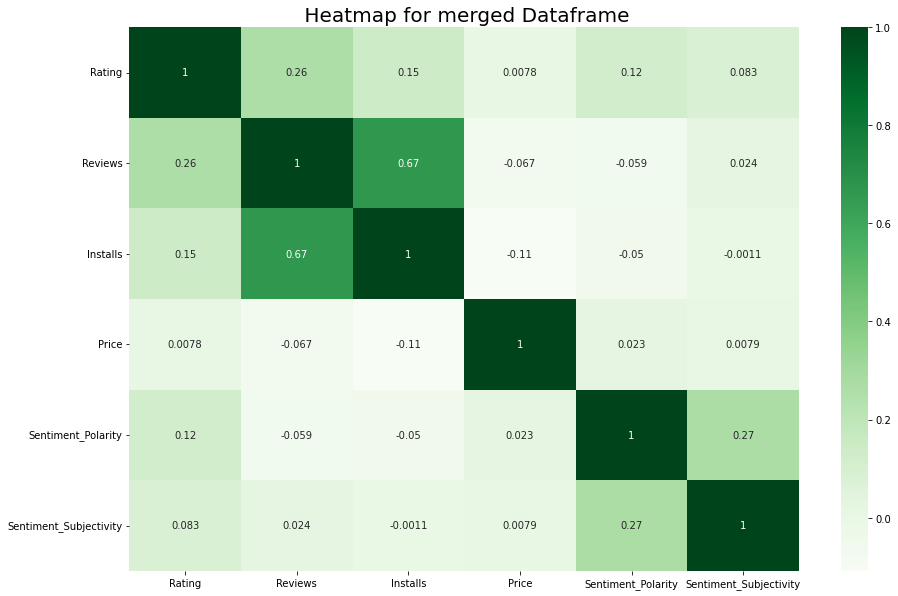

In [69]:
# Correlation heatmap
# Heat Map for the merged data frame
plt.figure(figsize = (15,10))
sns.heatmap(merged_df.corr(), annot= True, cmap='Greens')
plt.title(' Heatmap for merged Dataframe', size=20)

In [70]:
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

In [71]:
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


#**Data Visulization For User reviews**

##**1. Percentage of Review sentiments**

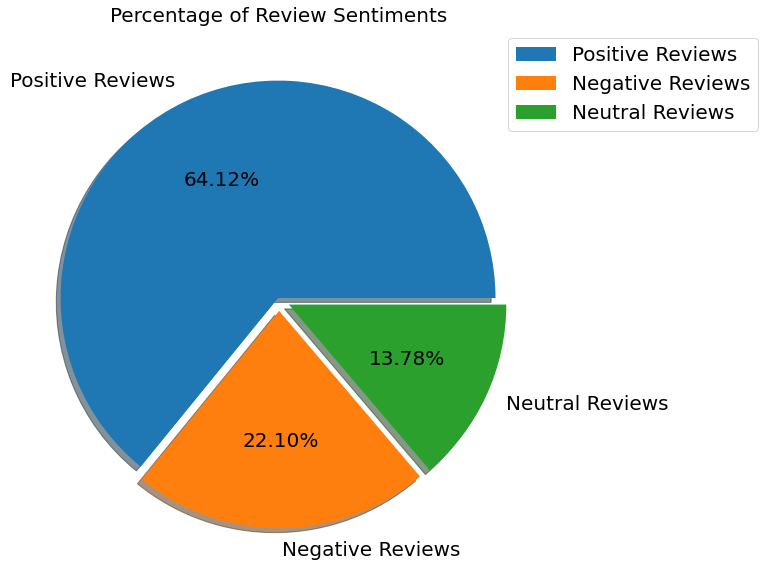

In [72]:
import matplotlib
counts = list(user_review['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (10, 10)
plt.pie(counts, labels=labels, explode=[0.01, 0.05, 0.05], shadow=True, autopct="%.2f%%")
plt.title('Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend(bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.show()

◀ **Inference :** 

▪ Positive Reviews 64.12%

▪ Negative Reviews 22.10%

▪ Neutral Reviews 13.78%

#**2. Apps with the highest number of positive reviews**

In [73]:
# positive reviews
positive_review = user_review[user_review['Sentiment']=='Positive']
positive_review

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


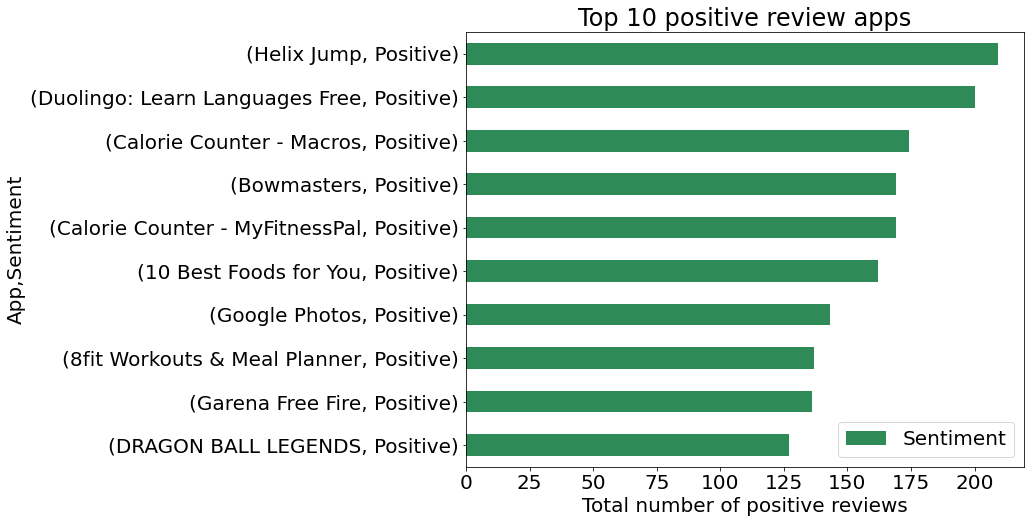

In [74]:
positive_review.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(10,8),color='seagreen').invert_yaxis()
plt.title("Top 10 positive review apps")
plt.xlabel('Total number of positive reviews')
plt.legend()

#**3. Apps with the highest number of Negative Review**

In [75]:
negative_review = user_review[user_review['Sentiment']=='Negative']
negative_review

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


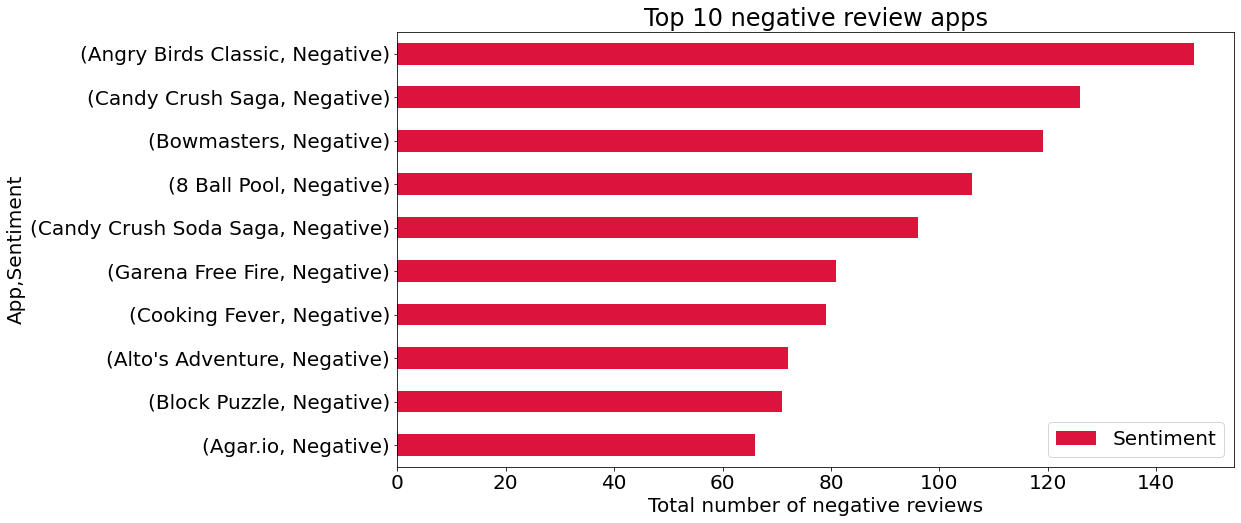

In [76]:
negative_review.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(15,8),color='crimson').invert_yaxis()
plt.title("Top 10 negative review apps")
plt.xlabel('Total number of negative reviews')
plt.legend()

#**4. Histogram of Sentiment subjectivity**

In [77]:
merged_df.Sentiment_Subjectivity.value_counts()

0.000000    5242
1.000000    2201
0.500000    1986
0.750000    1472
0.600000    1379
            ... 
0.480370       1
0.297222       1
0.493878       1
0.560165       1
0.545714       1
Name: Sentiment_Subjectivity, Length: 3442, dtype: int64

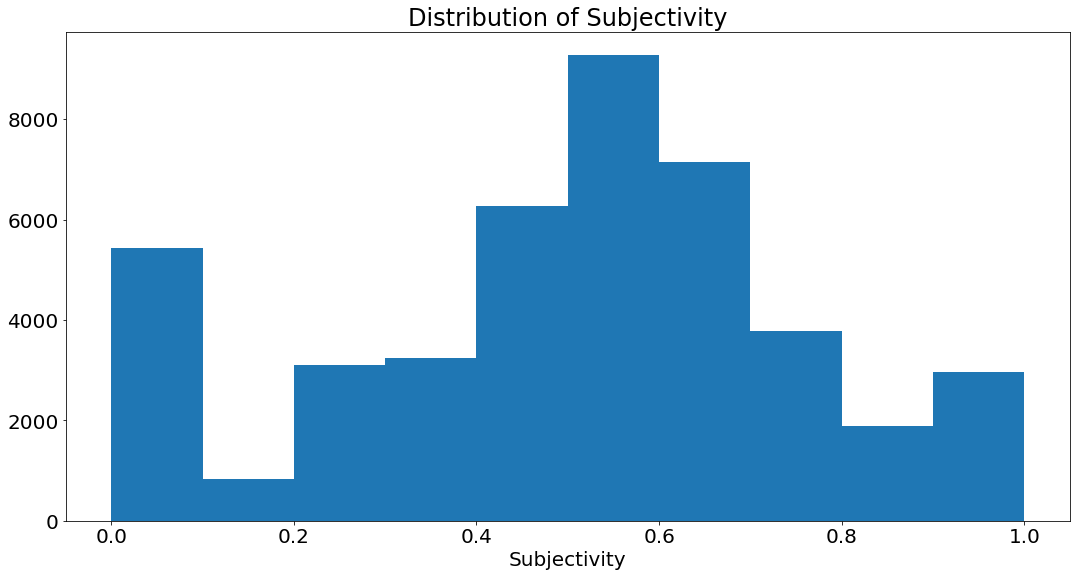

In [78]:
plt.figure(figsize=(18,9))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(merged_df[merged_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

 ◀ **Inference :**

**`0 - objective(fact), 1 - subjective(opinion)`**

It can be seen that maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that maximum number of users give reviews to the applications, according to their experience.

#**5. scatterplot of sentiment polarity and sentiment subjectivity**

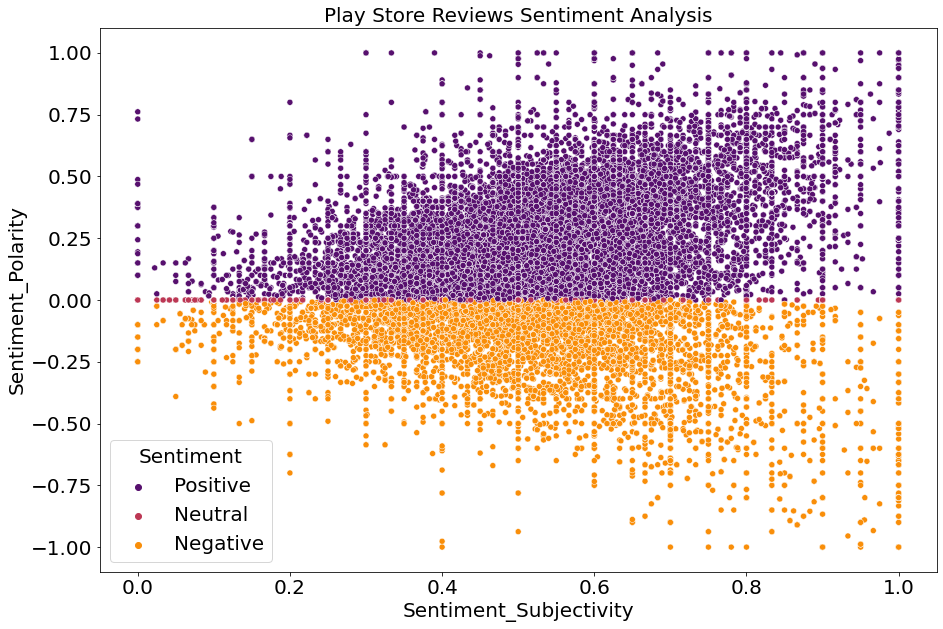

In [79]:
plt.figure(figsize=(15, 10))
sns.scatterplot(user_review['Sentiment_Subjectivity'], user_review['Sentiment_Polarity'],
                hue = user_review['Sentiment'], edgecolor='white', palette="inferno")
plt.title("Play Store Reviews Sentiment Analysis", fontsize=20)
plt.show()

◀ **Inference :** From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low

#**Conclusion :**
The dataset contains possibilities to deliver insights to understand customer demands better and thus help developers to popularize the product. Dataset can also be used to look whether the original ratings of the app matches the predicted rating to know whether the app is performing better or worse compared to other apps on the Play Store.